In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import os

In [60]:
os.chdir('/gpfs/alpine/scratch/gkhelash/bip109/mfs/ml_analysis/analysis_folder')

In [61]:
nhl_labels = np.load("numpy_files/nhl_labels.npy")
hl_labels = np.load("numpy_files/hl_labels.npy")

In [62]:
files = sorted(glob.glob("output/*.txt"))

In [72]:
## This step is going to take awhile (>10 minutes)

feature_temp = []
for file in files:
    pickleFile = open(file, 'rb')
    temp = pickle.load(pickleFile)
    if temp:
        for z in range(len(temp)):
            arg = [i for i,x in enumerate(temp[z][4]) if x[1]==True][0]
            threshold = temp[z][4][arg][2]
            dist = np.abs(((temp[z][1]>threshold).sum()/temp[z][1].flatten().shape[0])-((temp[z][2]>threshold).sum()/temp[z][2].flatten().shape[0]))
            feature_temp.append([file, z, temp[z][3], dist])
            

In [99]:
ranked_list = [feature_temp[i] for i in np.argsort([-x[3] for x in feature_temp])]

In [121]:
# excluded = np.concatenate(([1,2], np.arange(0,40), np.arange(400,8889))).tolist()
excluded = []

feature_list = [x for x in ranked_list if ((int(x[2][0]) not in excluded) and (int(x[2][2]) not in excluded))]


In [133]:
hit_start=0
hit_end=100
print('loading hits', hit_start, 'to', hit_end-1, 'of', len(feature_list), 'total hits')
print(' --q              -- atoms                           -- class separation')
[(q,x[2],x[3]) for q,x in enumerate(feature_list)][hit_start:hit_end]

loading hits 0 to 99 of 71202 total hits
 --q              -- atoms                           -- class separation


[(0, array(['293', 'N', '294', 'CZ'], dtype='<U21'), 0.7275238771805194),
 (1, array(['294', 'N', '294', 'CG'], dtype='<U21'), 0.7274942773699582),
 (2, array(['293', 'CA', '294', 'CZ'], dtype='<U21'), 0.7267049490883258),
 (3, array(['293', 'CA', '294', 'CE2'], dtype='<U21'), 0.7265470834319994),
 (4, array(['294', 'N', '294', 'CE2'], dtype='<U21'), 0.7264681506038361),
 (5, array(['293', 'C', '294', 'OH'], dtype='<U21'), 0.7263398847580709),
 (6, array(['293', 'C', '294', 'CZ'], dtype='<U21'), 0.7257676217538875),
 (7, array(['293', 'N', '294', 'OH'], dtype='<U21'), 0.7253433578025101),
 (8, array(['293', 'N', '294', 'CG'], dtype='<U21'), 0.7244849632962349),
 (9, array(['293', 'CB', '294', 'OH'], dtype='<U21'), 0.7244553634856736),
 (10, array(['293', 'CA', '294', 'CG'], dtype='<U21'), 0.724317231036388),
 (11, array(['294', 'N', '294', 'CE1'], dtype='<U21'), 0.7239916331202148),
 (12, array(['293', 'N', '294', 'CE1'], dtype='<U21'), 0.7236759018075618),
 (13, array(['293', 'CB', '2

In [134]:
q=86 # index of residue pair from list above. indices are on the left.

pickleFile = open(feature_list[q][0], 'rb')
temp_feature = pickle.load(pickleFile)[feature_list[q][1]]


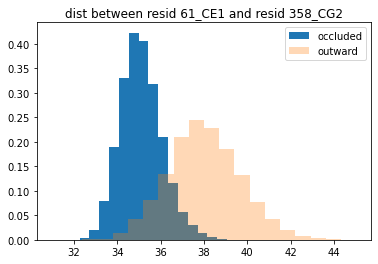

In [135]:
feature = temp_feature[0]

resid_1 = temp_feature[3][0]
atom_1 = temp_feature[3][1]
resid_2 = temp_feature[3][2]
atom_2 = temp_feature[3][3]

plt.hist(temp_feature[2].flatten(), density=True, label="occluded", bins=20) # HL class
plt.hist(temp_feature[1].flatten(), alpha=0.3, density=True, label="outward", bins=20) # NHL class
plt.legend()
plt.title("dist between resid " + str(resid_1) + "_" + atom_1 + " and resid " + str(resid_2) + "_" + atom_2);


In [136]:
temp_feature[4][0]

('occluded', True, 35.65775807698568)

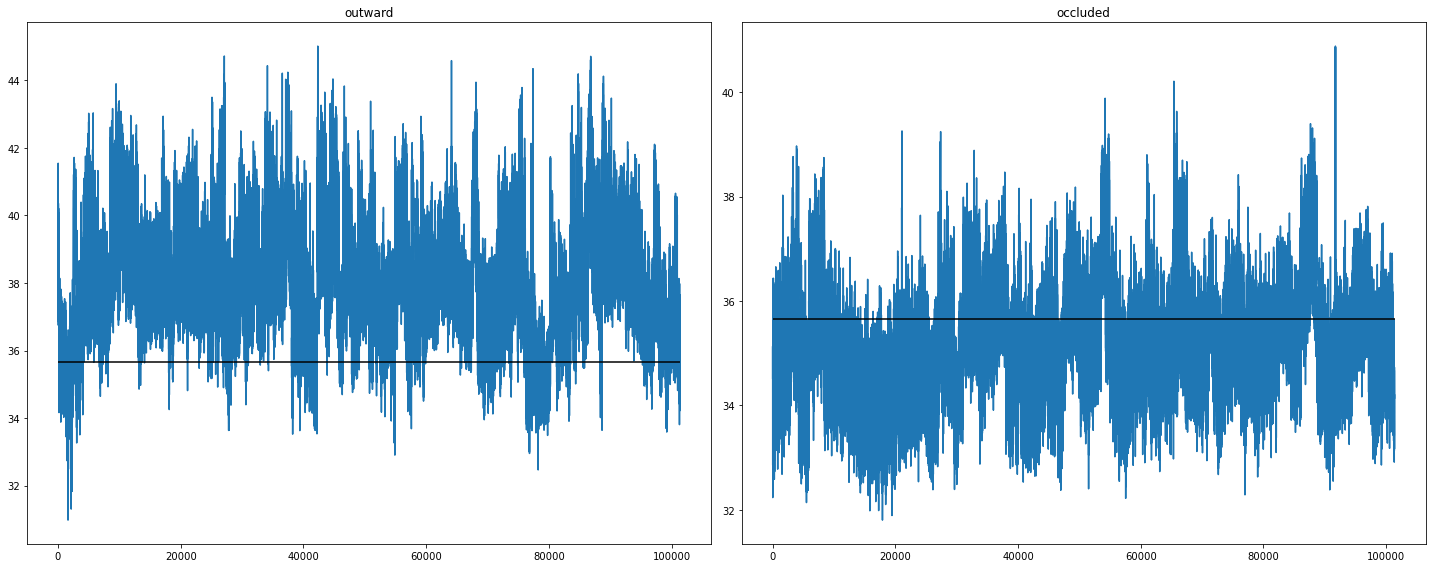

In [137]:
hall_ligs = ["occluded"]
nhall_ligs = ["outward"]

threshold=temp_feature[4][0][2]
stuff=[]
for lig in nhall_ligs:
    ind = [i for i,x in enumerate(nhl_labels) if lig in x]
    temp=[]
    for i in ind:
        temp.append(temp_feature[1][i])
    temp = np.asarray(temp)
    stuff.append((lig,temp))

for lig in hall_ligs:
    ind = [i for i,x in enumerate(hl_labels) if lig in x]
    temp=[]
    for i in ind:
        temp.append(temp_feature[2][i])
    temp = np.asarray(temp)
    stuff.append((lig,temp))

fig, axs = plt.subplots(1,2, figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i,x in enumerate(stuff):

    axs[i].plot(x[1].flatten())
    axs[i].set_title(x[0])
    axs[i].hlines(threshold, 0, len(x[1].flatten()), zorder=100, colors="black")
plt.tight_layout()

In [138]:
hall_ligs = ["occluded"]
nhall_ligs = ["outward"]

tmp=[]
for lig in hall_ligs:
    indices = [i for i,x in enumerate(hl_labels) if lig in x]
    for i in indices:
        tmp.append((hl_labels[i], (temp_feature[2][i]>threshold).mean()))
        
print("%6s | %8s" % ("traj", "mean above threshold"))
print("----------------------------")
    
for c1, c2 in tmp:
    print("%6s | %8f" % (c1, c2))
    
print("------------------------------")
tmp=[]
for lig in nhall_ligs:
    indices = [i for i,x in enumerate(nhl_labels) if lig in x]
    for i in indices:
        tmp.append((nhl_labels[i], (temp_feature[1][i]>threshold).mean()))

print("%6s | %8s" % ("traj", "mean above threshold"))
print("----------------------------")
    
for c1, c2 in tmp:
    print("%6s | %8f" % (c1, c2))


  traj | mean above threshold
----------------------------
occluded_0 | 0.258110
occluded_1 | 0.466019
occluded_2 | 0.080748
occluded_3 | 0.007104
occluded_4 | 0.037651
occluded_5 | 0.048070
occluded_6 | 0.224248
occluded_7 | 0.473123
occluded_8 | 0.566896
occluded_9 | 0.110822
occluded_10 | 0.147052
occluded_11 | 0.462941
occluded_12 | 0.482359
occluded_13 | 0.094719
occluded_14 | 0.185887
occluded_15 | 0.375562
occluded_16 | 0.219986
occluded_17 | 0.232299
occluded_18 | 0.128818
occluded_19 | 0.412029
occluded_20 | 0.645749
occluded_21 | 0.077196
occluded_22 | 0.478096
occluded_23 | 0.101823
------------------------------
  traj | mean above threshold
----------------------------
outward_0 | 0.546531
outward_1 | 0.992659
outward_2 | 1.000000
outward_3 | 0.994554
outward_4 | 0.991238
outward_5 | 0.996685
outward_6 | 0.966848
outward_7 | 0.991002
outward_8 | 0.999526
outward_9 | 0.794459
outward_10 | 0.990291
outward_11 | 0.992896
outward_12 | 0.928960
outward_13 | 0.940090
outward_14 